In [1]:
import sys
import os

dir = os.getcwd()

# Loop to move up the directory tree until we find FinModels
while os.path.basename(dir) != 'FinModels':
    dir = os.path.dirname(dir)  # Move up one level

sys.path.append(dir)
# Doda dostop tudi do drugih modelov

In [25]:
from Stock_Generation.StocksGeneration import generate_n_stock_data, visualize_generated_stocks
from BinomialModel import*
from EstimateParameters import estimate_volatility
import pandas as pd

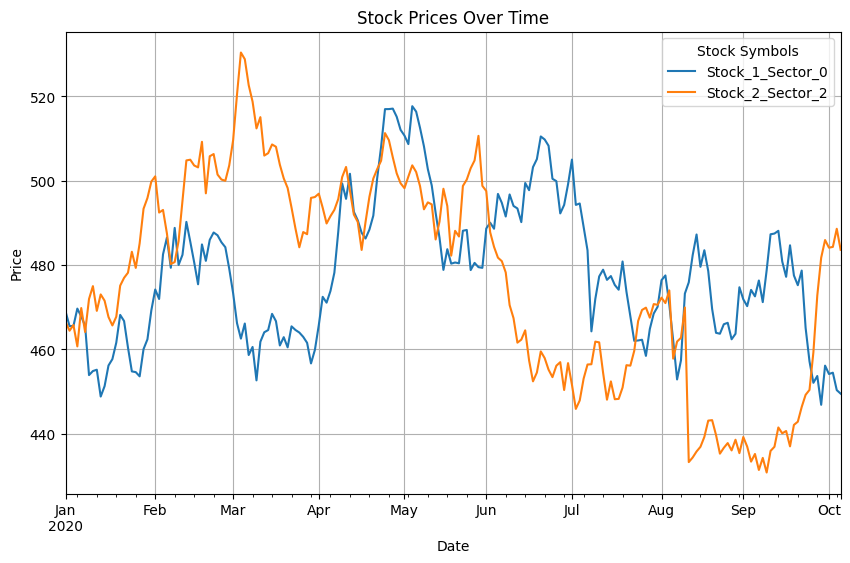

In [31]:
df_prices = generate_n_stock_data(n_stocks=2, n_days=200, random_seed=2**13-1)

visualize_generated_stocks(df_prices=df_prices)

In [32]:
volatilities = estimate_volatility(df_prices)
stock_names = volatilities.index

In [33]:
# Input data
S = 100     # Stock price
K = 100     # Strike price
T = 1       # Time to maturity (years)
r = 0.05    # Risk-free interest rate
sigma = None # Volatility (to be assigned per stock)
q = 0.0     # Dividend yield

n = 100       # Steps

option_type = ["put", "call"]
option_style = ["european", "american"]
binomial_models = ["crr", "jarrow-rudd", "tian"]

# Create an empty list to store the results
results = []

# Loop through the stock names and calculate the option prices
for stock in stock_names:
    for option in option_type:
        for style in option_style:
            for model in binomial_models:
                sigma = volatilities[stock]
                price = binomial_tree_model(S, K, T, r, sigma, q, n, model, option, style)
                # Store the result in the results list
                results.append({
                    'Stock': stock,
                    'Model': model,
                    'Option Style': style,
                    'Option Type': option,
                    'Price': price
                })

            if style == "european":
                sigma = volatilities[stock]
                price = black_scholes(S, K, T, r, sigma, q, option)
                # Store the result for Black-Scholes as well
                results.append({
                    'Stock': stock,
                    'Model': 'Black-Scholes',
                    'Option Style': style,
                    'Option Type': option,
                    'Price': price
                })

# Convert the results list into a DataFrame
df_results = pd.DataFrame(results)

# Display the results
print(df_results)


               Stock          Model Option Style Option Type     Price
0   Stock_1_Sector_0            crr     european         put  4.928464
1   Stock_1_Sector_0    jarrow-rudd     european         put  4.941428
2   Stock_1_Sector_0           tian     european         put  4.954876
3   Stock_1_Sector_0  Black-Scholes     european         put  4.946864
4   Stock_1_Sector_0            crr     american         put  5.456910
5   Stock_1_Sector_0    jarrow-rudd     american         put  5.464015
6   Stock_1_Sector_0           tian     american         put  5.464814
7   Stock_1_Sector_0            crr     european        call  9.805521
8   Stock_1_Sector_0    jarrow-rudd     european        call  9.818392
9   Stock_1_Sector_0           tian     european        call  9.831934
10  Stock_1_Sector_0  Black-Scholes     european        call  9.823922
11  Stock_1_Sector_0            crr     american        call  9.805521
12  Stock_1_Sector_0    jarrow-rudd     american        call  9.818392
13  St